Required Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import regex
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.ensemble import  VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import xgboost
import warnings
warnings.filterwarnings('ignore')

### data loading and pre processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
names = []
base='/content/drive/MyDrive/Data (1)'
with os.scandir(base) as entries:
    for entry in entries:
        if(entry.is_file() == False):
            names.append(entry.name)
names.sort()

In [ ]:
files = {}
unique = []
for name in names:
    l = []
    with os.scandir(base+ '/'  + name) as entries:
        for entry in entries:
            if(entry.is_file()):
                l.append(entry.name)
    files[name] = l
    files[name].sort()

In [ ]:
n=len(names)
for i in range(n):
    for j in files[names[i]]:
        for k in range(i+1, n):
            if j in files[names[k]]:
                files[names[k]].remove(j)

In [ ]:
print('the files are:', files)

the files are: {'Crime': ['14147.txt', '14831.txt', '14832.txt', '14982.txt', '14983.txt', '14984.txt', '14985.txt', '14986.txt', '14987.txt', '14988.txt', '14989.txt', '14990.txt', '14991.txt', '14992.txt', '14993.txt', '14994.txt', '14995.txt', '14996.txt', '14997.txt', '14998.txt', '14999.txt', '15000.txt', '15001.txt', '15002.txt', '15003.txt', '15168.txt', '15169.txt', '15170.txt', '15171.txt', '15172.txt', '15173.txt', '15174.txt', '15175.txt', '15176.txt', '15177.txt', '15178.txt', '15179.txt', '15180.txt', '15181.txt', '15182.txt', '15183.txt', '15184.txt', '15185.txt', '15186.txt', '15187.txt', '15188.txt', '15189.txt', '15190.txt', '15191.txt', '15192.txt', '15193.txt', '15194.txt', '15195.txt', '15196.txt', '15197.txt', '15198.txt', '15199.txt', '15200.txt', '15201.txt', '15202.txt', '15203.txt', '15204.txt', '15205.txt', '15206.txt', '15207.txt', '15208.txt', '15209.txt', '15210.txt', '15211.txt', '15212.txt', '15213.txt', '15214.txt', '15215.txt', '15216.txt', '15217.txt',

In [ ]:
import pandas as pd

data = []
for genre, texts in files.items():
    for text in texts:
        path = f"{base}/{genre}/{text}"
        with open(path, "r", encoding="latin1") as file:
            content = file.read()
            data.append({"Text": content, "Class": genre})

data = pd.DataFrame(data)
print(data.shape)


(6734, 2)


In [ ]:
unique = list(data.Text.unique())
len(unique)

unique=[]
for i in data.Text.unique():
  unique.append(i)
print(len(unique))

6581


In [ ]:
data_dic = dict(data)
data_dic

{'Text': 0       \nArchive-name: ripem/faq\nLast-update: Sun, 7...
 1       Approved: news-answers-request@MIT.EDU\nConten...
 2       Approved: news-answers-request@MIT.EDU\nConten...
 3       Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...
 4       \n   Some sick part of me really liked that ph...
                               ...                        
 6729    Distribution: world\nMessage-ID: <cshotton-180...
 6730    \nJeffrey L. Cook sez;\n>>This object would no...
 6731    Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...
 6732    Message-ID: <1t6dd1$11v@network.ucsd.edu>\nRef...
 6733    \nIn article <C4KvJF.4qo@well.sf.ca.us> metare...
 Name: Text, Length: 6734, dtype: object,
 'Class': 0         Crime
 1         Crime
 2         Crime
 3         Crime
 4         Crime
          ...   
 6729    Science
 6730    Science
 6731    Science
 6732    Science
 6733    Science
 Name: Class, Length: 6734, dtype: object}

In [ ]:
unique_dict = {}
i = 0
n= len(list(data_dic['Text']))
for k in range(n):
    if data_dic['Text'][k] in unique:
        val=[data_dic['Text'][k], data_dic['Class'][k]]
        unique_dict[i] = val
        unique.remove(data_dic['Text'][k])
        i +=1

In [ ]:
data=pd.DataFrame(unique_dict)
data = data.T
data.columns = ['Text', 'Class']
print(data.shape)

(6581, 2)


In [ ]:
import nltk
nltk.download('stopwords')
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    lower=text.lower()
    word_tokens = WordPunctTokenizer().tokenize(lower)
    filtered=[]
    for w in word_tokens:
      if w.isalpha() and len(w) > 3:
        filtered.append(regex.sub(u'\p{^Latin}', u'', w))
    filtered_text=[]
    for w in filtered:
      if w not in stop_words:
        filtered_text.append(wordnet_lemmatizer.lemmatize(w, pos="v"))
    return " ".join(filtered_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('wordnet')

data["filtered_text"] = list(map(lambda x: filter_text(x, stop), data["Text"]))
data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Class,filtered_text
0,"\nArchive-name: ripem/faq\nLast-update: Sun, 7...",Crime,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\nConten...,Crime,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\nConten...,Crime,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...,Crime,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that ph...,Crime,sick part really like phrase actually merely t...


In [ ]:
def find_topwords(x,y):
  # Join filtered_text of all crime data into one string
  all_text = " ".join(data[data.Class == x].filtered_text) 

  # Count the frequency of each word in all_text
  word_counts = Counter(all_text.split())

  # Get the top y most frequent words
  top_y_words = [word for word, count in word_counts.most_common(y)]

  # Filter the word counts to only include the top y words
  top_y_counts = {word: count for word, count in word_counts.items() if word in top_y_words}

  # Create a DataFrame from the top y word counts
  count_df = pd.DataFrame.from_dict(top_y_counts, orient='index', columns=['count'])

  # Create a bar plot of the top y words
  plt.figure(figsize=(y,5))
  sns.barplot(x=count_df.index, y=count_df['count'], palette=sns.color_palette("rocket"))

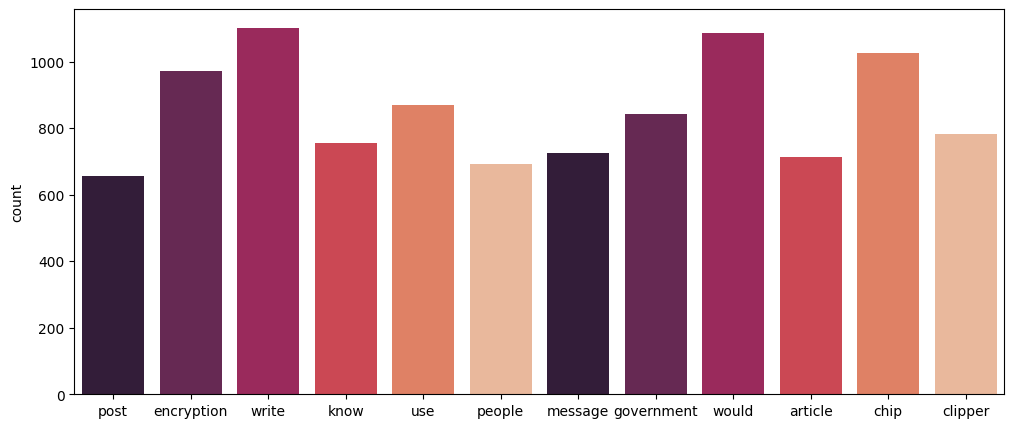

In [ ]:
find_topwords('Crime',12)

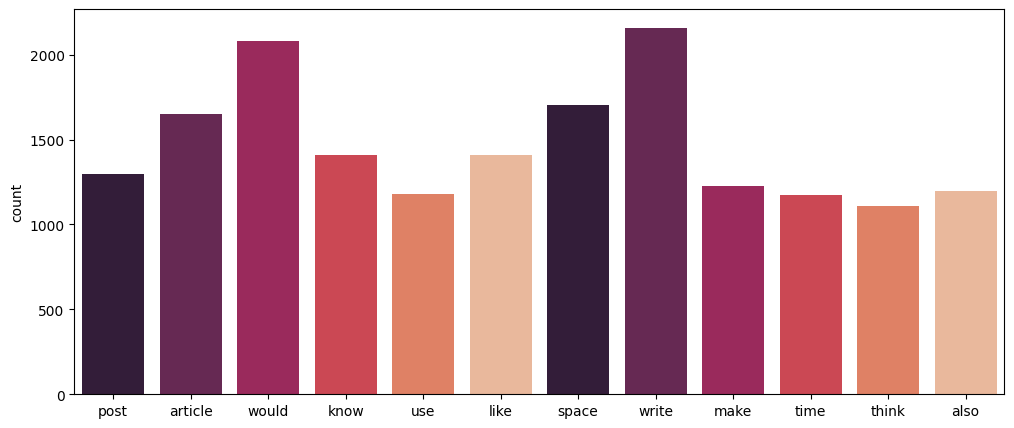

In [ ]:
find_topwords('Science',12)

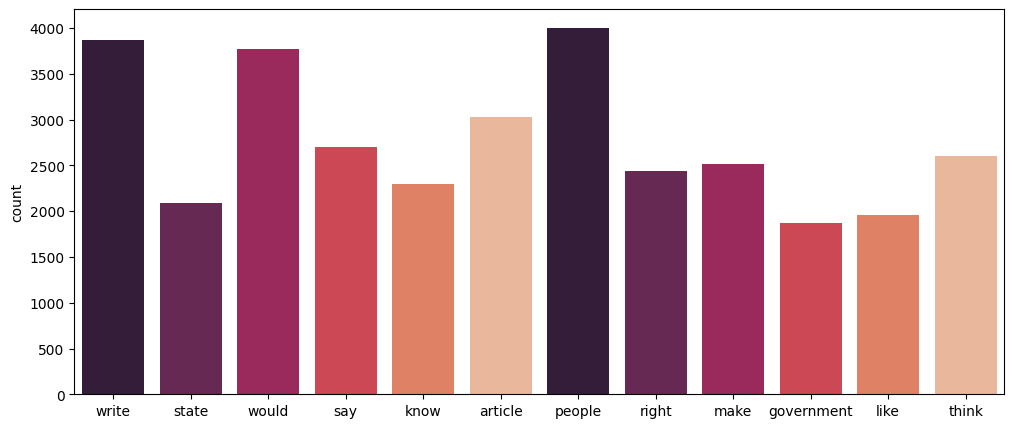

In [ ]:
find_topwords('Politics',12)

In [ ]:
vectorizer = TfidfVectorizer(lowercase=False)

# Fit the vectorizer on the data
vectorizer.fit(data)

# Transform the data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data['filtered_text'])

# Print the shape of the resulting matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

TF-IDF matrix shape: (6581, 43129)


In [ ]:
le=LabelEncoder()
data['Class']= le.fit_transform(data['Class'])

In [ ]:
data

,Text,Class,filtered_text
0,"\nArchive-name: ripem/faq\nLast-update: Sun, 7...",0,archive name ripem last update post still rath...
1,Approved: news-answers-request@MIT.EDU\nConten...,0,approve news answer request content type text ...
2,Approved: news-answers-request@MIT.EDU\nConten...,0,approve news answer request content type text ...
3,Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...,0,message bilbo suite reply miller suite nntp po...
4,\n Some sick part of me really liked that ph...,0,sick part really like phrase actually merely t...
...,...,...,...
6576,Distribution: world\nMessage-ID: <cshotton-180...,2,distribution world message cshotton reference ...
6577,\nJeffrey L. Cook sez;\n>>This object would no...,2,jeffrey cook object would interfere anyone enj...
6578,Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...,2,message reference jut amdahl nntp post host hp...
6579,Message-ID: <1t6dd1$11v@network.ucsd.edu>\nRef...,2,message network ucsd reference ucsu colorado n...


In [ ]:
print(data)

                                                   Text  Class  \
0     \nArchive-name: ripem/faq\nLast-update: Sun, 7...      0   
1     Approved: news-answers-request@MIT.EDU\nConten...      0   
2     Approved: news-answers-request@MIT.EDU\nConten...      0   
3     Message-ID: <1ppvai$l79@bilbo.suite.com>\nRepl...      0   
4     \n   Some sick part of me really liked that ph...      0   
...                                                 ...    ...   
6576  Distribution: world\nMessage-ID: <cshotton-180...      2   
6577  \nJeffrey L. Cook sez;\n>>This object would no...      2   
6578  Message-ID: <1tdqmvINN3q2@hp-col.col.hp.com>\n...      2   
6579  Message-ID: <1t6dd1$11v@network.ucsd.edu>\nRef...      2   
6580  \nIn article <C4KvJF.4qo@well.sf.ca.us> metare...      2   

                                          filtered_text  
0     archive name ripem last update post still rath...  
1     approve news answer request content type text ...  
2     approve news answer request

In [ ]:
crime_content = data[data['Class'] == 0]['filtered_text'].values
crime_content = " ".join(crime_content)

politics_content = data[data['Class'] == 1]['filtered_text'].values
politics_content = " ".join(politics_content)

science_content = data[data['Class'] == 2]['filtered_text'].values
science_content = " ".join(science_content)

contents = [crime_content, politics_content, science_content]

In [ ]:
def gen_wordcloud(content):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(content)
    return wordcloud

(-0.5, 799.5, 799.5, -0.5)

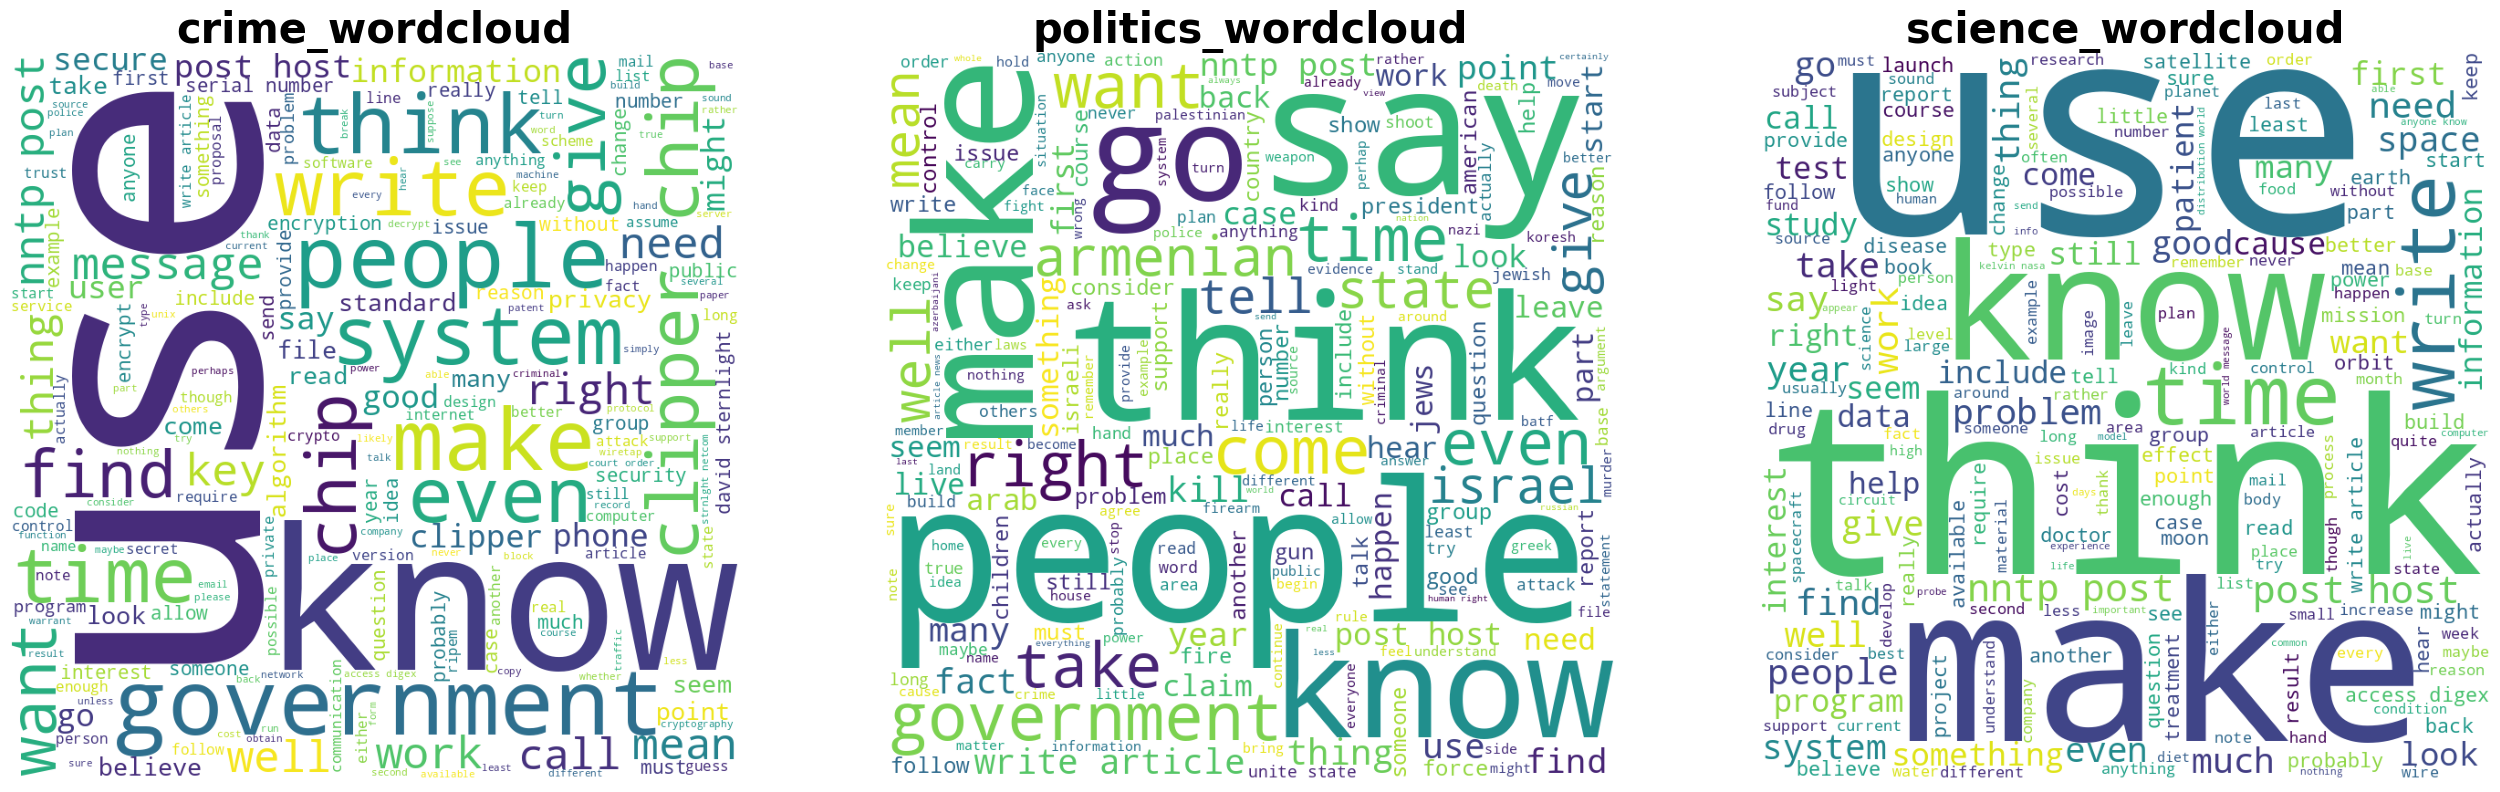

In [ ]:
fig, axs = plt.subplots(1, 3, figsize= (32,16), facecolor= None)

# plot the WordCloud image  
crime_wordcloud = gen_wordcloud(crime_content)
axs[0].imshow(crime_wordcloud)
axs[0].set_title('crime_wordcloud', fontweight="bold", size=30)
axs[0].axis("off")

politics_wordcloud = gen_wordcloud(politics_content)
axs[1].imshow(politics_wordcloud)
axs[1].set_title('politics_wordcloud', fontweight="bold", size=30)
axs[1].axis("off")

science_wordcloud = gen_wordcloud(science_content)
axs[2].imshow(science_wordcloud)
axs[2].set_title('science_wordcloud', fontweight="bold", size=30)
axs[2].axis("off")

# plt.axis("off")
# plt.tight_layout(pad = 0)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(tfidf_matrix ,data['Class'], stratify=data['Class'], test_size=0.2)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define hyperparameters to search over
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
max_iter_values = [100, 200, 300, 400, 500]
warm_start_values = [True, False]
solver_values = ['lbfgs', 'newton-cg', 'liblinear']
#penalty_values = ['l1', 'l2']

# Initialize best hyperparameters and best score
best_params = {}
best_score = float('-inf')

# Iterate over hyperparameters
for c in c_values:
    for max_iter in max_iter_values:
        for warm_start in warm_start_values:
            for solver in solver_values:
                #for penalty in penalty_values:
                    # Initialize model with current hyperparameters
                    model = LogisticRegression(C=c, max_iter=max_iter, warm_start=warm_start, solver=solver)#, penalty=penalty)

                    # Compute cross-validation score
                    #score = cross_val_score(model, x_train, y_train, cv=5).mean()
                    model.fit( x_train, y_train)
                    y_pred=model.predict(x_val)
                    score = accuracy_score(y_val,y_pred )

                    # Update best hyperparameters and best score if current score is better
                    if score > best_score:
                        best_score = score
                        best_params = {'C': c, 'max_iter': max_iter, 'warm_start': warm_start, 'solver': solver}#, 'penalty': penalty}

# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 100, 'max_iter': 100, 'warm_start': True, 'solver': 'liblinear'}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Define logistic regression model with best hyperparameters
model_lr = LogisticRegression(
    C=best_params['C'],
    max_iter=best_params['max_iter'],
    warm_start=best_params['warm_start'],
    solver=best_params['solver'],
)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model_lr, x_train, y_train, cv=5)

# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.95536562 0.95916429 0.94491928 0.95821462 0.95437262]
Mean score: 0.9544072882475924
Standard deviation: 0.00506096513768816


In [ ]:
model_lr.fit(x_train, y_train)

LogisticRegression(C=100, solver='liblinear', warm_start=True)

In [ ]:
predicted = model_lr.predict(x_val)

lr_acc = accuracy_score(y_val,predicted)
lr_acc

0.9658314350797267

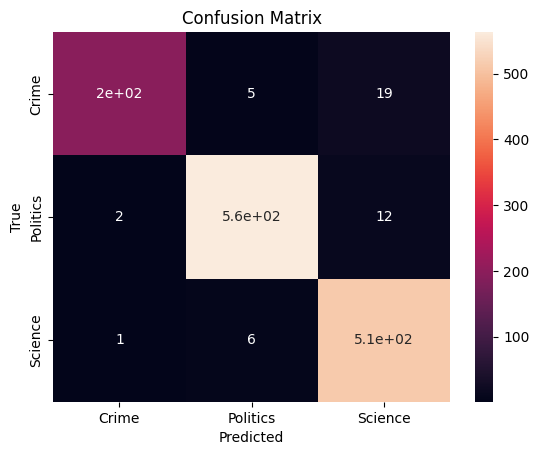

In [ ]:
ax = sns.heatmap(confusion_matrix(y_val,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['Crime','Politics','Science']),
            yticklabels=(['Crime','Politics','Science']))

## Multinomial Naive Bayes 

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

# Define hyperparameters to search over
alpha_values = np.arange(0, 1, 0.001)
fit_prior_values = [True, False]

# Initialize best hyperparameters and best score
best_params = {}
best_score = float('-inf')

# Iterate over hyperparameters
for alpha in alpha_values:
    for fit_prior in fit_prior_values:
        # Initialize model with current hyperparameters
        model = MultinomialNB(alpha=alpha, fit_prior=fit_prior)

        # Compute cross-validation score
        model.fit( x_train, y_train)
        y_pred=model.predict(x_val)
        score = accuracy_score(y_val,y_pred )


        # Update best hyperparameters and best score if current score is better
        if score > best_score:
            best_score = score
            best_params = {'alpha': alpha, 'fit_prior': fit_prior}

# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'alpha': 0.01, 'fit_prior': True}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

# Define logistic regression model with best hyperparameters
model_MNB = MultinomialNB(
    alpha=best_params['alpha'],
    fit_prior=best_params['fit_prior']
)

# Evaluate model using cross-validation
cv_scores = cross_val_score(model_MNB, x_train, y_train, cv=5)

# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.95916429 0.9677113  0.95536562 0.96106363 0.96577947]
Mean score: 0.9618168621970904
Standard deviation: 0.00446472035813848


In [ ]:
model_MNB.fit(x_train, y_train)

MultinomialNB(alpha=0.01)

In [ ]:
predicted = model_MNB.predict(x_val)

MNB_acc = accuracy_score(y_val,predicted)
MNB_acc

0.9650721336370539

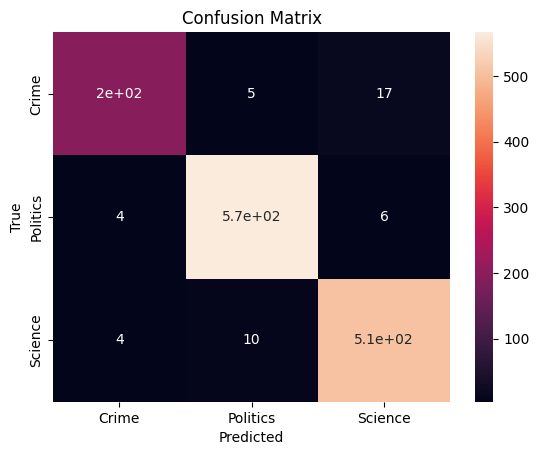

In [ ]:
ax = sns.heatmap(confusion_matrix(y_val,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['Crime','Politics','Science']),
            yticklabels=(['Crime','Politics','Science']))

##DecisionTreeClassifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define hyperparameters to search over
criterion_values = ['gini', 'entropy']
splitter_values = ['best', 'random']
max_depth_values = [5, 10, 20, 30, 40, 50]
max_features_values = ['auto', 'sqrt', 'log2']

# Initialize best hyperparameters and best score
best_params = {}
best_score = float('-inf')

# Iterate over hyperparameters
for criterion in criterion_values:
    for splitter in splitter_values:
        for max_depth in max_depth_values:
            for max_features in max_features_values:
                # Initialize model with current hyperparameters
                model = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, max_features=max_features)

                # Compute cross-validation score
                model.fit( x_train, y_train)
                y_pred=model.predict(x_val)
                score = accuracy_score(y_val,y_pred )


                # Update best hyperparameters and best score if current score is better
                if score > best_score:
                    best_score = score
                    best_params = {'criterion': criterion, 'splitter': splitter, 'max_depth': max_depth, 'max_features': max_features}

# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 50, 'max_features': 'sqrt'}


In [ ]:
model_dt = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    splitter=best_params['splitter'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features']
)

cv_scores = cross_val_score(model_dt, x_train, y_train, cv=5)

# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.662868   0.72269706 0.6980057  0.69135802 0.68821293]
Mean score: 0.6926283405370859
Standard deviation: 0.019182446622445018


In [ ]:
model_dt.fit(x_train, y_train)
predicted = model_dt.predict(x_val.toarray())

dt_acc = accuracy_score(y_val,predicted)
dt_acc

0.7031131359149583

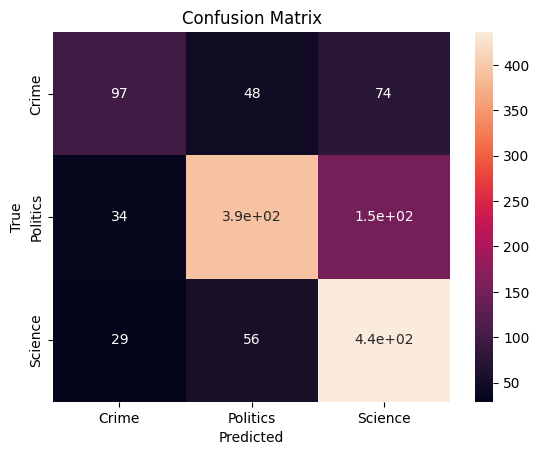

In [ ]:
ax = sns.heatmap(confusion_matrix(y_val,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['Crime','Politics','Science']),
            yticklabels=(['Crime','Politics','Science']))

## SGDClassifier with Squared Hinge Loss

In [ ]:
model_sgd_hinge = SGDClassifier(
    loss='squared_hinge',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    max_iter=1000,
    shuffle=True,
    epsilon=0.1,
    random_state=42).fit(x_train, y_train)

model_sgd_hinge.score(x_train, y_train)

0.9998100303951368

In [ ]:
predicted = model_sgd_hinge.predict(x_val)

sgd_hinge_acc = accuracy_score(y_val,predicted)
sgd_hinge_acc

0.9369779802581625

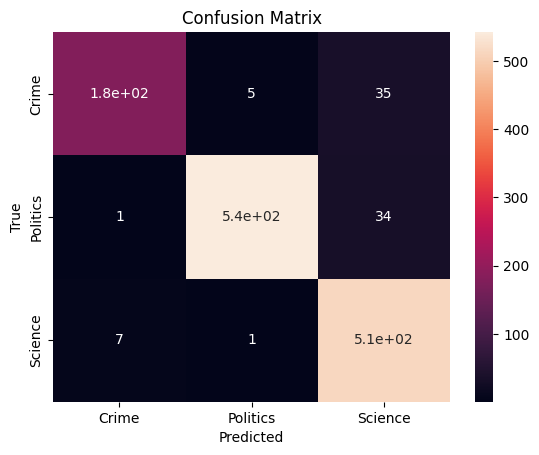

In [ ]:
ax = sns.heatmap(confusion_matrix(y_val,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['Crime','Politics','Science']),
            yticklabels=(['Crime','Politics','Science']))

## Xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score as ac


subsample=0.7
xgb_model = xgb.XGBClassifier(subsample=subsample, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_val)
accuracy = ac(y_val, y_pred)
acc=accuracy*100

print('Accuracy', acc,'%')

Accuracy 92.02733485193622 %


## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define hyperparameters to search over
n_neighbors_values = [40,60,80,100]
weights_values = ['uniform', 'distance']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size_values = [30,50,70,90]

# Initialize best hyperparameters and best score
best_params = {}
best_score = float('-inf')

# Iterate over hyperparameters
for n_neighbors in n_neighbors_values:
    for weights in weights_values:
        for algorithm in algorithm_values:
            for leaf_size in leaf_size_values:
                    # Initialize model with current hyperparameters
                    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size)

                    # Compute cross-validation score
                    model.fit( x_train, y_train)
                    y_pred=model.predict(x_val)
                    score = accuracy_score(y_val,y_pred )


                    # Update best hyperparameters and best score if current score is better
                    if score > best_score:
                        best_score = score
                        best_params = {'n_neighbors': n_neighbors, 'weights': weights, 'algorithm': algorithm, 'leaf_size': leaf_size}

# Print best hyperparameters
print("Best hyperparameters:", best_params)

Best hyperparameters: {'n_neighbors': 40, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 30}


In [ ]:
model_knn = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    algorithm=best_params['algorithm'],
    leaf_size=best_params['leaf_size']
)

cv_scores = cross_val_score(model_knn, x_train, y_train, cv=5)

# Print mean and standard deviation of cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.91168091 0.92212726 0.90788224 0.92497626 0.91825095]
Mean score: 0.9169835234474017
Standard deviation: 0.0063702306225474695


In [ ]:
model_knn.fit(x_train, y_train)
predicted = model_knn.predict(x_val.toarray())

knn_acc = accuracy_score(y_val,predicted)
knn_acc

0.9255884586180714

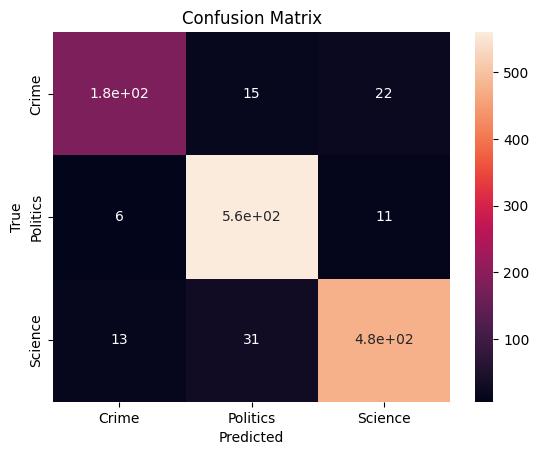

In [ ]:
ax = sns.heatmap(confusion_matrix(y_val,predicted),annot=True)
ax = ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix',
            xticklabels=(['Crime','Politics','Science']),
            yticklabels=(['Crime','Politics','Science']))

## Voting Classifier

Hard Voting

In [ ]:
import abc
from sklearn.ensemble import VotingClassifier as vc

voting_model_h = vc(estimators=[
    ('model_lr', model_lr),
    ('model_MNB', model_MNB),
    ('model_dt', model_dt),
    ('model_knn', model_knn),
    ('xgb_model',xgb_model)
],voting='hard' )


voting_model_h.fit(x_train, y_train)
voting_accuracy = voting_model_h.score(x_val, y_val)
acc_h=voting_accuracy*100

print("Voting Classifier Accuracy:",acc_h,'%')

Voting Classifier Accuracy: 96.35535307517085 %


Soft Voting

In [ ]:
import abc
from sklearn.ensemble import VotingClassifier as vc

voting_model_s = vc(estimators=[
    ('model_lr', model_lr),
    ('model_MNB', model_MNB),
    ('model_dt', model_dt),
    ('model_knn', model_knn),
    ('xgb_model',xgb_model)
],voting='soft' )

voting_model_s.fit(x_train, y_train)
voting_accuracy = voting_model_s.score(x_val, y_val)
acc_s=voting_accuracy*100


print("Voting Classifier Accuracy:",acc_s,'%')

Voting Classifier Accuracy: 96.05163249810175 %


## Comparison

In [ ]:
results_df = pd.DataFrame({'Classifier': ['LogisticRegression','MultinomialNB', 'DecisionTreeClassifier', 'SGDClassifier','xgboost','KNeighborsClassifier','Hard Voting','Soft Voting'],
                           'Accuracy before':[lr_acc,MNB_acc,dt_acc,sgd_hinge_acc,acc,knn_acc,acc_h,acc_s],
                        
                           })

results_df

,Classifier,Accuracy before
0,LogisticRegression,0.965831
1,MultinomialNB,0.965072
2,DecisionTreeClassifier,0.703113
3,SGDClassifier,0.936978
4,xgboost,92.027335
5,KNeighborsClassifier,0.925588
6,Hard Voting,96.355353
7,Soft Voting,96.051632


## Testing on Unseen dataset

In [124]:
Science_1 = '''Subject: Invitation to attend the Annual Science Symposium

Dear [Name],

We are pleased to invite you to attend our Annual Science Symposium, which will take place on [Date] at [Location]. This year's event will feature presentations and discussions on the latest research and developments in the fields of science, technology, engineering, and mathematics.

We have invited renowned scientists and experts from various fields to share their insights and expertise, and we believe that you will find their presentations both informative and engaging. The symposium will cover a broad range of topics, including artificial intelligence, renewable energy, and biotechnology.

In addition to the presentations, there will be opportunities to network with other professionals in the field and participate in interactive workshops. You will also have the chance to learn about the latest products and services from leading companies in the industry.

As someone who is passionate about science and innovation, we believe that you will find this event both inspiring and educational. Please let us know if you are able to attend by [RSVP Date]. We look forward to seeing you at the symposium.

Best regards,

[Your Name]

[Your Title]'''

Crime_1 = '''Subject: Request for Increased Security Measures in the Area

Dear [Name of Police Chief/Security Officer],

I am writing to express my concerns about the recent increase in crime in our area. Over the past few weeks, I have heard about several incidents of theft and vandalism in the neighborhood, which has left me and other residents feeling unsafe in our own homes.

As a member of this community, I strongly believe that it is the responsibility of local law enforcement to ensure the safety and security of its citizens. Therefore, I would like to request that the police department take immediate action to increase security measures in the area.

Some suggestions that I believe would be effective in deterring crime in the area include:

Increasing police patrols during peak hours
Installing security cameras in public spaces
Enhancing street lighting in areas with poor visibility
Providing self-defense training for residents
I am confident that implementing these measures would go a long way in reducing crime and increasing safety in the neighborhood.

Thank you for taking the time to consider my request. I look forward to hearing your thoughts on this matter.

Sincerely,

[Your Name]'''

Crime_2 = '''Subject: Community Safety Meeting

Dear [Name],

I hope this email finds you well. As you may know, there have been several incidents of crime in our community over the past few months. To address this issue, we are organizing a community safety meeting on [Date and Time] at [Location].

The meeting will be attended by local law enforcement officials and community leaders who will discuss the recent incidents and share ways in which we can work together to ensure the safety of our community. We encourage you to attend and participate in this important discussion.

Please feel free to invite your friends and neighbors to the meeting as well. We believe that it is important to come together as a community to address this issue and work towards finding solutions.

If you have any questions or concerns, please do not hesitate to contact us. We hope to see you at the meeting.

Thank you for your attention to this matter.

Sincerely,
[Your Name]'''

Politics_1 = '''Subject: Invitation to Attend Political Rally

Dear [Name],

I am writing to invite you to join me at a political rally on [Date] at [Location]. As you may know, this is a crucial time in our country's history, and it is more important than ever to come together to support our shared values and beliefs.

At the rally, we will hear from local leaders and activists who are working hard to make a difference in our community. We will also have the opportunity to meet other like-minded individuals and discuss our thoughts and ideas about the issues that matter most to us.

I strongly believe that by working together, we can make a positive impact on our community and our nation as a whole. This rally is a chance to do just that, and I hope that you will be able to join me.

Please RSVP by [Date] so that we can ensure that we have enough space and resources for everyone who plans to attend.

Thank you for your time, and I hope to see you at the rally.

Best regards,

[Your Name]'''

Politics_2 = '''Subject: Invitation to Join a Political Discussion Group

Dear [Name],

I hope this email finds you well. I am writing to invite you to join a discussion group on current political issues. As you may know, the upcoming election season is fast approaching, and we believe it is essential to stay informed and engaged in the political process.

Our group is composed of individuals who have a passion for politics and want to engage in thoughtful and respectful discussions on a variety of topics related to politics. Our aim is to create a space for diverse opinions and perspectives to be shared openly and respectfully.

The group will meet every two weeks on [day] at [time] via Zoom. During the meetings, we will discuss various topics related to politics, such as current events, policy proposals, and campaign strategies. We also plan to have guest speakers from different political backgrounds to provide diverse viewpoints.

We believe that participating in this group will be a valuable learning experience and an opportunity to engage in constructive and respectful dialogue. We hope that you will consider joining us and contributing your unique perspective to the group.

Please let us know if you are interested in joining our discussion group by responding to this email. We will send you the Zoom link and additional details on the first meeting.

Thank you for your consideration, and we hope to hear from you soon.

Best regards,
[Your name]'''

In [132]:
unseen=[Science_1, Politics_1, Crime_1, Crime_2]

In [133]:
unseen_data = pd.DataFrame({'Text':unseen})

unseen_data

,Text
0,Subject: Invitation to attend the Annual Scien...
1,Subject: Invitation to Attend Political Rally\...
2,Subject: Request for Increased Security Measur...
3,Subject: Community Safety Meeting\n\nDear [Nam...


In [134]:
unseen_data["filtered_text"] = list(map(lambda x: filter_text(x, stop), unseen_data["Text"]))
unseen_data.head()

,Text,filtered_text
0,Subject: Invitation to attend the Annual Scien...,subject invitation attend annual science sympo...
1,Subject: Invitation to Attend Political Rally\...,subject invitation attend political rally dear...
2,Subject: Request for Increased Security Measur...,subject request increase security measure area...
3,Subject: Community Safety Meeting\n\nDear [Nam...,subject community safety meet dear name hope e...


In [136]:
vectorizer = TfidfVectorizer(lowercase=False)

# Fit the vectorizer on the unseen_data
vectorizer.fit(unseen_data)

# Transform the unseen_data into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(unseen_data['filtered_text'])

In [158]:
def model_predict(model):
  predictions = voting_model_h.predict(tfidf_matrix)
  prediction = []
  for i in predictions:
    if i == 1:
      prediction.append('Politics')
    elif i == 0:
      prediction.append('Crime')
    else:
      prediction.append('Science')
  unseen_data_results = pd.DataFrame({'text':['Science_1', 'Politics_1', 'Politics_2', 'Crime_1', 'Crime_2'] ,
                           'Prediction':prediction
                           })
  print(unseen_data_results)

### Logistic Regression

In [159]:
model_predict(model_lr)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


###Multinomial Naive bayes

In [160]:
model_predict(model_MNB)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


###Decision Tree Classifier

In [161]:
model_predict(model_dt)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


### SGD Classifier

In [162]:
model_predict(model_sgd_hinge)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


### Xgboost

In [163]:
model_predict(xgb_model)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


### KNN

In [164]:
model_predict(model_knn)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


### Voting

Soft

In [166]:
model_predict(voting_model_s)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science


Hard

In [167]:
model_predict(voting_model_h)

         text Prediction
0   Science_1    Science
1  Politics_1   Politics
2  Politics_2   Politics
3     Crime_1      Crime
4     Crime_2    Science
